<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S---Regression-Classification/blob/main/Project_Na%C3%AFve_Bayes_%26_K_Nearest_Neighbour_(KNN)/Mahfuzur_Project_Na%C3%AFve_Bayes_%26_K_Nearest_Neighbour_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Biomechanical Features of Orthopedic Patients

In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as **Normal** or **Abnormal**

![img](https://user-images.githubusercontent.com/67789350/105318173-2d45f880-5be9-11eb-9acf-58bf5d130fbc.png)

To get started , first download the csv file from this [link](https://drive.google.com/file/d/1uPHmxoTvoemq8X54Y5GehYy13_J404Zn/view?usp=sharing)

We have to implement K Nearest Neighbour, the algorithm is used to classify points according to class of their K nearest neighbour point

And also on the the same dataset Implement a Gaussian Naive Bayes based classifier

### Now that you have the dataset , let us get started !



# Section I : Accessing the Data

- Make a pandas DataFrame from the CSV
- How many variables does the dataset contain?
- What is the data about?

its about irregularity in bones 

- What are we trying to predict here?

We are trying to predict, if disease is present or not

In [2]:
url = 'https://raw.githubusercontent.com/mahfuz978/TECH-I.S---Regression-Classification/main/ortho_knnnb.csv'
import pandas as pd
df = pd.read_csv(url)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
len(df.columns) # we have 7 columns / variables

7

In [4]:
df.isnull().sum() # no null values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
df['class'].unique() # two unique values perfect for classification problems

array(['Abnormal', 'Normal'], dtype=object)

# Section II : Exploratory Data Analysis

- Perform some descriptive statistics and make a note of your findings 
- Plot appropriate graphs to understand the relation between the variables.
- Point out any observations and comment on the strength of the relationships if any.

In [6]:
df.info() # class is the only categorial column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
corr = df.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


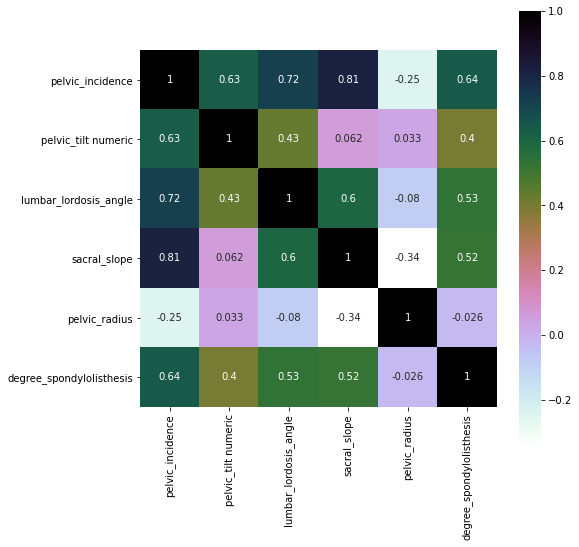

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True, annot = True, cmap = 'cubehelix_r')
plt.show();

In [10]:
corr.mean() # here pelvic radius is the only column which has the least correlation with the other columns

pelvic_incidence            0.592119
pelvic_tilt numeric         0.425806
lumbar_lordosis_angle       0.533626
sacral_slope                0.442854
pelvic_radius               0.056111
degree_spondylolisthesis    0.511294
dtype: float64

In [11]:
df['class'].value_counts() # looks like classes are imbalanced but not at the point where I need to use SMOTE

Abnormal    210
Normal      100
Name: class, dtype: int64

#Section III : Prepare data for Training!

- Make a new column `symptom_class` with the abnormal rows as 1 and the normal rows as 0, drop the `class` column
- Split the entire dataset into independent features and symptoms as the response variable
- Normalize the variables.


In [12]:
df['class'] = df['class'].str.replace('Abnormal', '1') # abnormal as 1
df['class'] = df['class'].str.replace('Normal', '0') # normal as 0
df['symptom_class'] = df['class'] # creating a copy
df = df.drop(['class'], axis=1) # deleting the original
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [13]:
df.symptom_class.value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [14]:
df.dtypes # need to change the data type for symptom_class

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
symptom_class                object
dtype: object

In [15]:
df.symptom_class = df.symptom_class.astype('int64')# changed the dtypes to int for the symptom class column

In [16]:
df.dtypes # fixed

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
symptom_class                 int64
dtype: object

In [17]:
data_corr = df.corr()
data_corr = data_corr['symptom_class'][:-1]
data_corr #[abs(data_corr)>=0.30]
# as we can see all the coulmns are correlated with symptom_class

pelvic_incidence            0.353336
pelvic_tilt numeric         0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
degree_spondylolisthesis    0.443687
Name: symptom_class, dtype: float64

In [18]:
# df = df.drop(['pelvic_radius'], axis=1) # pelvic radius colum dropped

In [19]:
# lets seperate the target from the independent variables
features = df.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'] 
target = df[['symptom_class']]

In [20]:
features.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259


In [21]:
target.head(2) # these are the dependent variables

,symptom_class
0,1
1,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
features = pd.DataFrame(MMS.fit_transform(features), columns=features.columns)
features.head(2) # these are the independent variables

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365


In [23]:
# sns.set_style("whitegrid");
# sns.pairplot(df, hue="symptom_class");
# plt.show();

#Section IV : Training with KNN

- Use `train_test_split` from `sklearn` and split the parameters and classes into train and test sets 
- Starting with **three** nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
- Try with increasing the **k** value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of **k**.
- Evaluate your final model using appropriate metrics for classification and comment on them.

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state = 1)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(248, 6)
(62, 6)
(248, 1)
(62, 1)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
print('acc score with k = 3 = {} %'.format(round(accuracy_score(pred, y_test)*100, 2)))

acc score with k = 3 = 77.42 %


In [28]:
knn_params = {'n_neighbors': list(range(1,50, 1)), 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5)
grid_knn.fit(x_train, y_train);

In [29]:
best_parameters = grid_knn.best_estimator_
best_parameters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [30]:
knn = best_parameters.fit(x_train, y_train)
pred = knn.predict(x_test)
print('acc score with the best params = {} %'.format(round(accuracy_score(pred, y_test)*100, 2)))
# grid search gives me the same result

acc score with the best params = 77.42 %


In [31]:
# Tunings Parameters without Grid Search

train_accuracy = []
test_accuracy = []

for k in range(1,50):                                 # K from 1 to 50
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(x_train, y_train)
#######################################################################################
    train_pred = KNN.predict(x_train)                 #prediction on train data
    train_score = accuracy_score(train_pred,y_train)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(x_test)                   #prediction on test data
    test_score = accuracy_score(test_pred,y_test)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8225806451612904 with K = 21


In [32]:
KNN = KNeighborsClassifier(n_neighbors = 21, metric='manhattan')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [33]:
pred = KNN.predict(x_test)
print('acc score with k = 21  = {} %'.format(round(accuracy_score(pred, y_test)*100, 2)))
# looks like we have a winner

acc score with k = 21  = 83.87 %


#Section V : Training with Naive Bayes

- Now , fit a Naive Bayes Classifier to the same data. 
- Train a NB model with default arguments and make a note of training and test metrics
- What are your inferences on the relative performance between the KNN and NB based models? 

naive_bayes performed really good just in the first try compared to KNN I had to tune a lot of parameters

- Which of these models would you recommend and with what reasons ?

In [34]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)
pred = nbc.predict(x_test)

In [35]:
print('The accuracy of the NB is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the NB is 82.26%


In [36]:
#finding accuracy from the confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


#Section VI : Wraping it up ! (This is optional but good for... like spinach...)

- Which of these models performed better ? 
- Test these two models on other datasets as well !
  - To get started you could try these on 
    - The IRIS Dataset
    - The Breast Cancer Dataset
- What other datasets these two models would perform well in?

